In [116]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [117]:
df_waterflow = pd.read_csv("waterflow/water_potability.csv")

## Exploratory Data Analysis

In [118]:
df_waterflow.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [119]:
df_waterflow.shape

(3276, 10)

- Un jeu de données de 3276 observations avec 10 features

In [120]:
# Informations sur les colonnes
df_waterflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [121]:
df_waterflow.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

- Des valeurs manquantes dans les colonnes ph, Sulfate et Trihalomethanes

In [122]:
df_waterflow.duplicated().sum()

0

- Pas de valeurs dupliquées

In [123]:
print("Nombre d'observations non potables : ", len(df_waterflow[ df_waterflow["Potability"] == 0 ]))
print("Nombre d'observationspotables : ", len(df_waterflow[ df_waterflow["Potability"] == 1 ]))

Nombre d'observations non potables :  1998
Nombre d'observationspotables :  1278


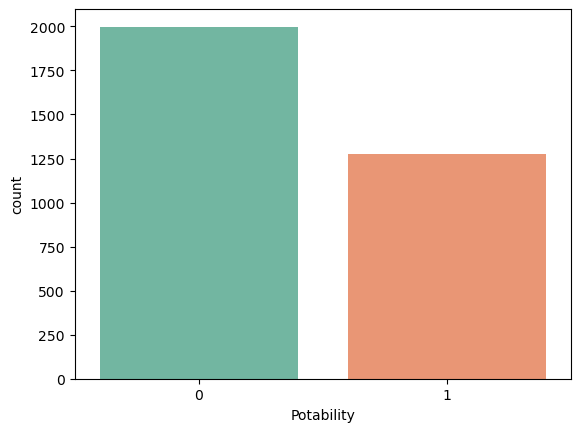

In [124]:
sns.countplot(df_waterflow, x="Potability", palette="Set2")
plt.show()


- Pour la variable target Potability, nous avons plus d'observations non potables que potables .

<Axes: ylabel='ph'>

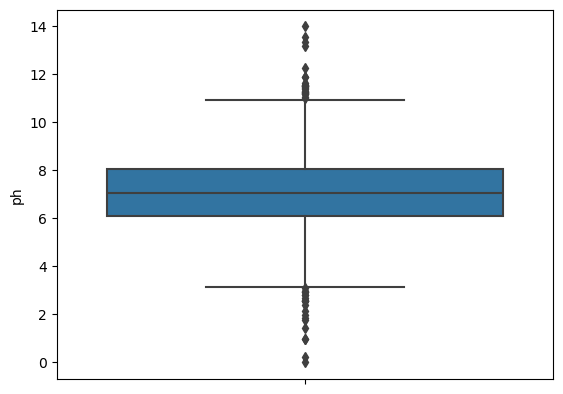

In [125]:
sns.boxplot(df_waterflow,y = "ph")

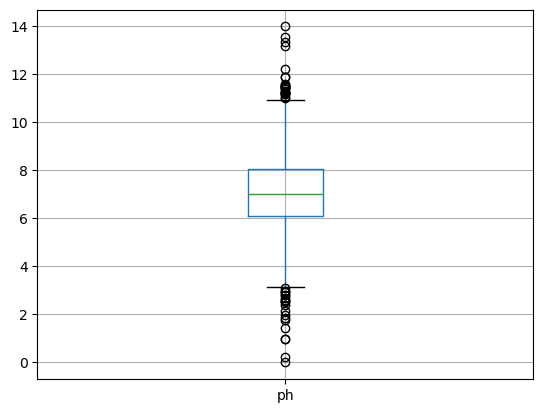

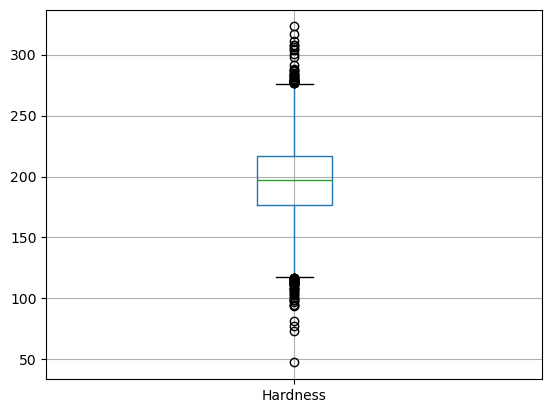

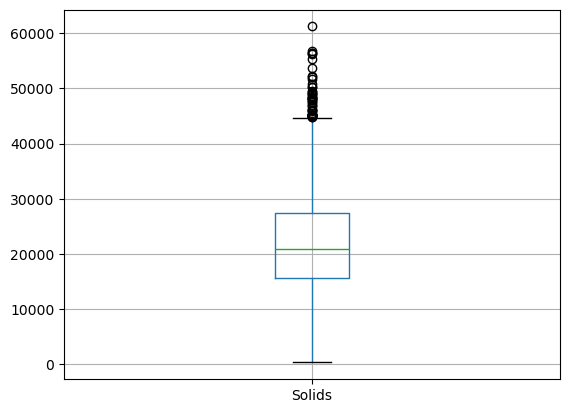

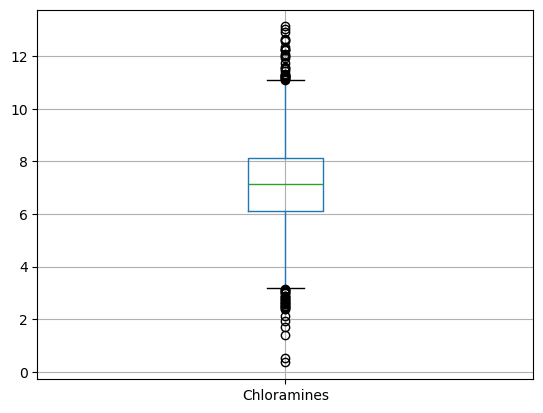

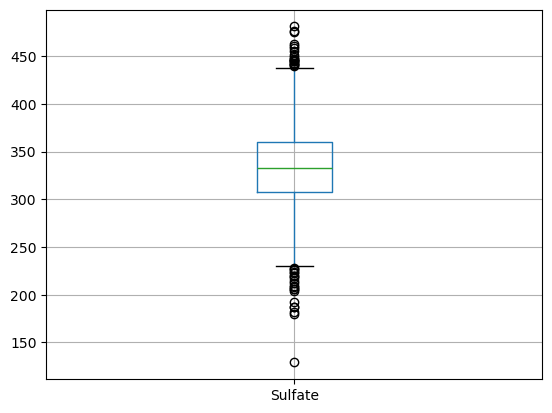

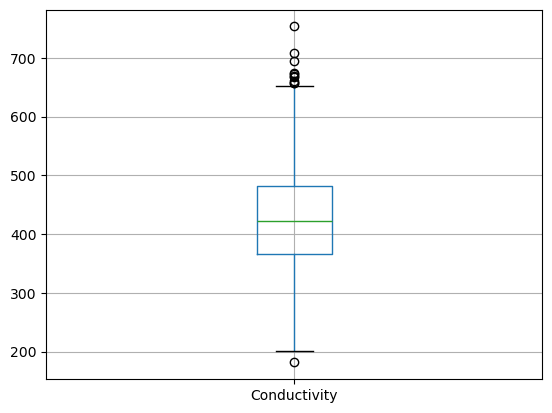

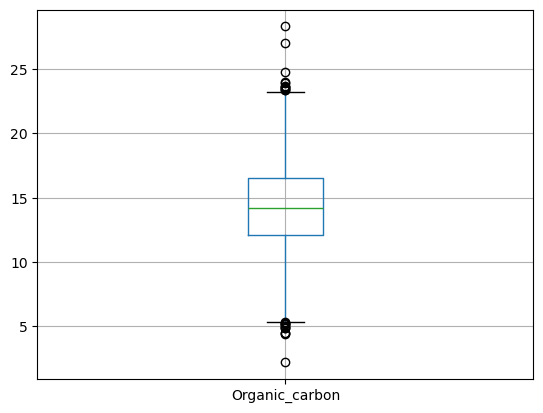

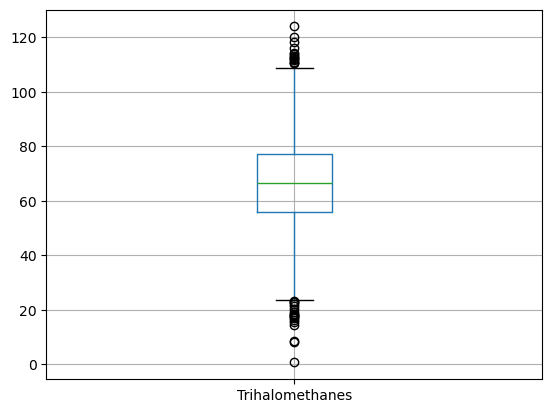

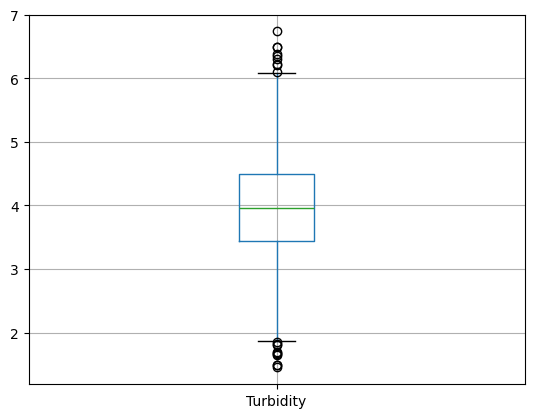

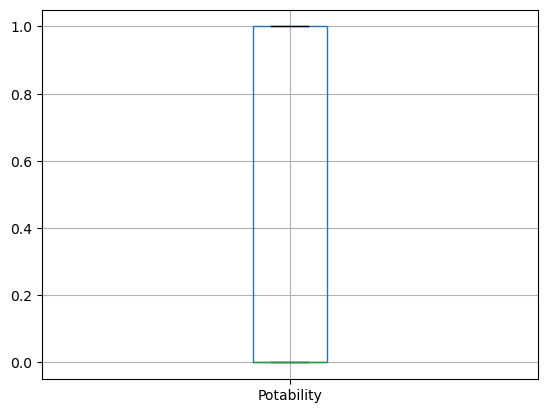

In [126]:
for column in df_waterflow.columns:
    plt.figure()
    df_waterflow.boxplot([column])

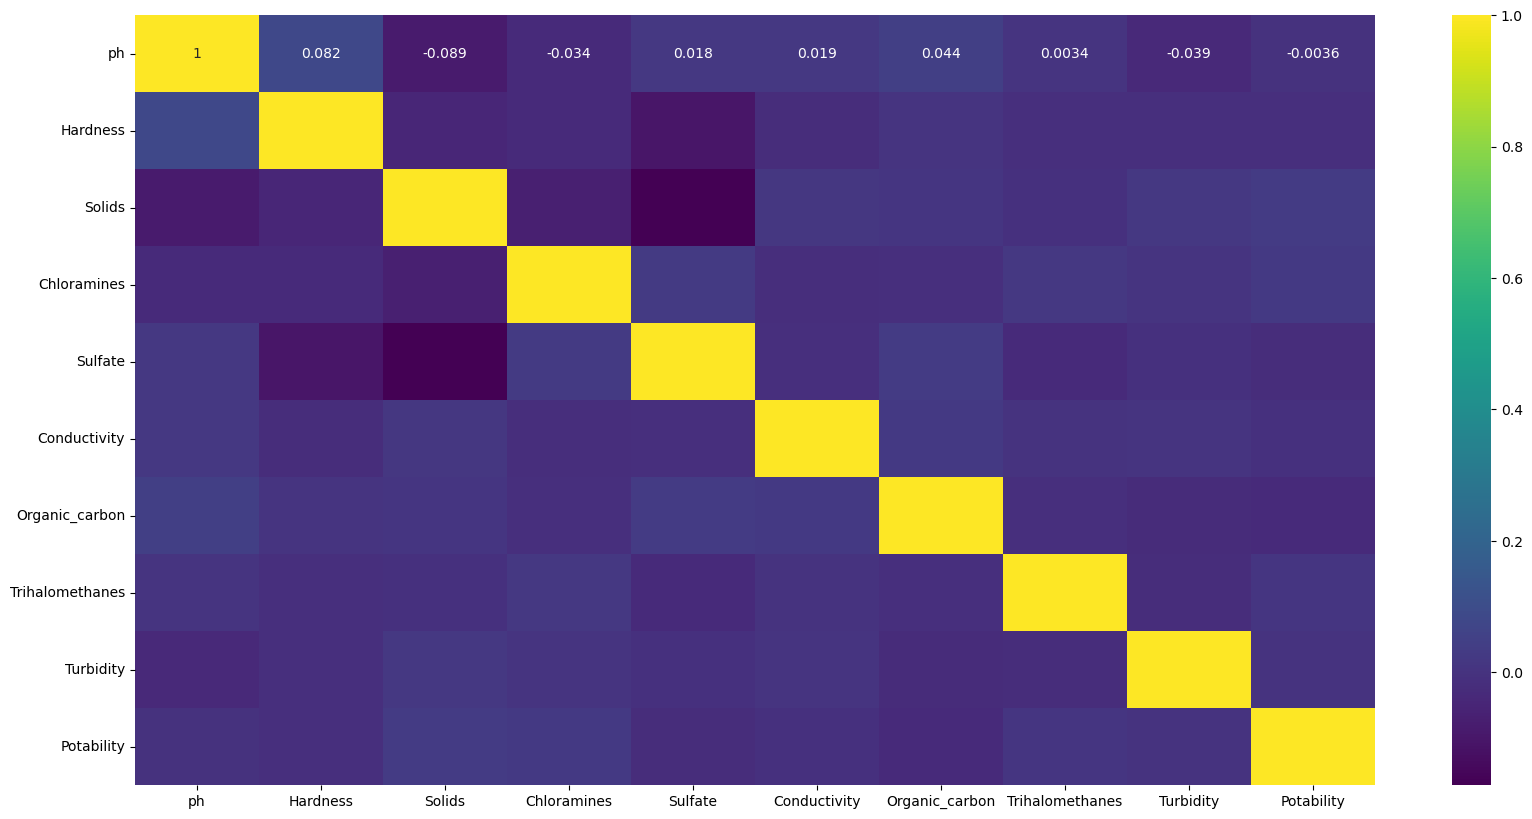

In [130]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_waterflow.corr(), annot=True, cmap='viridis')  # Change 'coolwarm' to your desired color map
plt.show()

In [192]:
# Definir les valeurs min et max acceptables de 'ph"

df_waterflow_filtered = df_waterflow[(df_waterflow['ph'] >= 4) & (df_waterflow['ph'] <= 11) ]

In [193]:
# Definir valeurs acceptable de 'Hardness'
df_waterflow_filtered = df_waterflow[(df_waterflow['Hardness'] >= 130) & (df_waterflow['Hardness'] <= 275)]

In [162]:
df_waterflow_filtered.shape

(3166, 10)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



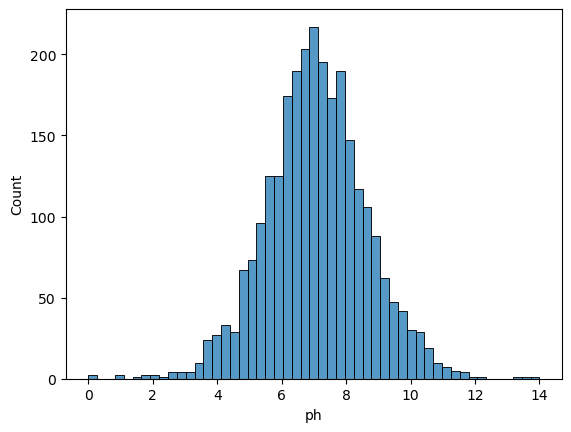

In [163]:
sns.histplot(df_waterflow_filtered , x = df_waterflow_filtered ["ph"])
plt.show()

# Machine Learning

In [182]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, confusion_matrix,  f1_score, precision_score, recall_score, roc_curve, accuracy_score

In [165]:
imputer = SimpleImputer(strategy='mean')

In [166]:
columns_to_impute = ['ph', 'Sulfate', 'Trihalomethanes']
df_waterflow_filtered[columns_to_impute] = imputer.fit_transform(df_waterflow_filtered[columns_to_impute])

/var/folders/sb/5fj35csj63n3m8hydqtjrg740000gp/T/ipykernel_19217/1613793320.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [168]:
# Vérification des valeurs manquantes
df_waterflow_filtered.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [176]:
# Définir la variable explicative et la variable expliquée
X = df_waterflow_filtered.drop('Potability', axis=1).values
y = df_waterflow_filtered['Potability']

In [177]:
# Mise à échelle des features 

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [178]:
# Diviser en set d'entrainement et set de validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 12 )

In [179]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression()

In [180]:
y_pred = logReg.predict(X_test)

In [186]:
accuracy = accuracy_score(y_test, y_pred)*100
print(accuracy)

61.68421052631579


In [188]:
#cm = confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True)
#print(cm)

In [190]:
import mlflow


# Définir les paramètres du modèle
params = {
    "C": 1.0,
   "max_iter": 100
}

# Configurer le tracking URI pour pointer vers le serveur MLflow
#mlflow.set_tracking_uri("http://localhost:5000")

# Initialiser l'expérience
experiment_name = "experiment_water_quality"
mlflow.set_experiment(experiment_name)

# Démarrer une nouvelle exécution
#with mlflow.start_run():
    # Entraîner le modèle
#    model = LogisticRegression(C=params["C"], max_iter=params["max_iter"])
#    model.fit(X_train, y_train)

#    # Faire des prédictions
#    y_pred = model.predict(X_test)
#    
#    # Calculer l'accuracy
#    accuracy = accuracy_score(y_test, y_pred)
    
    # Enregistrer les paramètres
#    mlflow.log_params(params)
    
#    # Enregistrer les métriques
#    mlflow.log_metric("accuracy", accuracy)
    
    # Enregistrer le modèle
#   mlflow.sklearn.log_model(model, "model")
    
#   print(f"Model accuracy: {accuracy}")
    
    # Afficher le lien vers l'interface MLflow pour cette exécution
#    run_id = mlflow.active_run().info.run_id
#    print(f"Run ID: {run_id}")
#    print(f"Run URL: http://localhost:5000/#/experiments/{mlflow.get_experiment_by_name(experiment_name).experiment_id}/runs/{run_id}")

#


ModuleNotFoundError: No module named 'mlflow'